# File Information

Name: Amie Davis

Course: DSC630 - Predictive Analytics

Assignment Number: Final Project Part 4

Purpose: Build model(s) for each state

Usage: Python 3.7.6

   Developed using Jupter Notebook 6.0.3

# Data Source
Uniform Crime Reporting Program Data: National Incident-Based Reporting System, [United States], 2016; United States Federal Bureau of Investigation; Inter-university Consortium for Political and Social Research (ICPSR), University of Michigan; https://www.icpsr.umich.edu/icpsrweb/NACJD/NIBRS/ 


Geodetic Data for US Cities: https://simplemaps.com/data/us-cities


# Part 5

In Part 5, I will build separate models for the top 6 reporting states to predict the type of offenses committed, given location information.

## Import required packages

In [1]:
# Suppress Warnings
#import warnings
#warnings.filterwarnings('ignore') 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare Data

In [2]:
# Load data into dataframe
data_file = "Data\crime_offenses_top6.csv"    # Data from Top 6 States
df = pd.read_csv(data_file)

C:\Users\amomu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,11,14,15,16,17,18,19,41,42,44,46,51,52,53,54,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Eliminate features

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'X1', 'ORI', 'INC_NUM', 'VIC_INC_DATE', 'VICTIM_TYPE',
       'ACT_TYPE_OFFC', 'ASSG_TYPE_OFFC', 'AGE_OF_VICTIM', 'SEX_OF_VICTIM',
       'RACE_OF_VICTIM', 'ETHNIC_OF_VIC', 'VIC_RESIDENT', 'ASSAULT_CIRC1',
       'ASSAULT_CIRC2', 'JUST_HOM_CIRC', 'INJURY_TYPE1', 'INJURY_TYPE2',
       'INJURY_TYPE3', 'INJURY_TYPE4', 'INJURY_TYPE5', 'NUM_RECS_PER_VICTIM',
       'VIC_INC_YEAR', 'VIC_INC_MONTH', 'VIC_INC_DAY', 'VIC_INC_DOW',
       'NUM_STATE_CODE', 'CITY', 'STATE', 'POP_GROUP', 'CTRY_DIVISION',
       'CTRY_REGION', 'AGENCY_IND', 'CORE_CITY', 'FBI_OFFICE', 'JUDICIAL_DIST',
       'CURRENT_POP1', 'UCR_COUNTY_CD1', 'MSA_CD1', 'LAST_POP1',
       'FIPS_COUNTY1', 'city_ascii', 'state_name', 'county_fips',
       'county_name', 'county_fips_all', 'county_name_all', 'lat', 'lng',
       'population', 'density', 'source', 'military', 'incorporated',
       'timezone', 'ranking', 'zips', 'id', 'OFF_CODE'],
      dtype='object')


In [4]:
# Remove irrelevant and redundant fields

# Drop unneeded columns
# KEEP STATE
df.drop(['X1','id', 'county_fips', 'county_fips_all', 'Unnamed: 0', 
         'ORI', 'INC_NUM', 'NUM_RECS_PER_VICTIM', 'VIC_INC_DATE', 'VIC_INC_YEAR', 'VIC_INC_DAY',
         'ASSAULT_CIRC1', 'ASSAULT_CIRC2', 'JUST_HOM_CIRC', 
         'INJURY_TYPE1', 'INJURY_TYPE2', 'INJURY_TYPE3',
         'INJURY_TYPE4', 'INJURY_TYPE5', 'NUM_RECS_PER_VICTIM', 'AGENCY_IND',
         'FBI_OFFICE', 'JUDICIAL_DIST', 'FIPS_COUNTY1',
         'LAST_POP1', 'UCR_COUNTY_CD1', 'MSA_CD1', 'city_ascii', 'CITY',
         'state_name', 'county_name', 'county_name_all', 'population', 'zips',
         'source'], 
        axis=1, inplace = True)

# Also removing victim demograohics since they are not relevant to predict offenses and locations
df.drop(['VICTIM_TYPE','RACE_OF_VICTIM', 'AGE_OF_VICTIM', 
         'SEX_OF_VICTIM', 'ETHNIC_OF_VIC', 'VIC_RESIDENT'],
        axis=1, inplace = True)

# Verify Change
print(df.columns)


Index(['ACT_TYPE_OFFC', 'ASSG_TYPE_OFFC', 'VIC_INC_MONTH', 'VIC_INC_DOW',
       'NUM_STATE_CODE', 'STATE', 'POP_GROUP', 'CTRY_DIVISION', 'CTRY_REGION',
       'CORE_CITY', 'CURRENT_POP1', 'lat', 'lng', 'density', 'military',
       'incorporated', 'timezone', 'ranking', 'OFF_CODE'],
      dtype='object')


In [5]:
# Replace NA values with NULL
df.replace('NA', np.nan)

# Remove Unknown Values with NULL
df.replace('U', np.nan)

# Drop columns with mostly NULL data
df.drop(['ACT_TYPE_OFFC','ASSG_TYPE_OFFC'],
        axis=1, inplace = True)

# Drop records with remaining null values
df.dropna(axis=0, inplace=True)

## Encoding

In [6]:
# Change DOW to numeric value
def f_dow(df):
    if df['VIC_INC_DOW'] == 'Sunday':
        val = 1
    elif df['VIC_INC_DOW'] == 'Monday':
        val = 2
    elif df['VIC_INC_DOW'] == 'Tuesday':
        val = 3
    elif df['VIC_INC_DOW'] == 'Wednesday':
        val = 4
    elif df['VIC_INC_DOW'] == 'Thursday':
        val = 5
    elif df['VIC_INC_DOW'] == 'Friday':
        val = 6
    elif df['VIC_INC_DOW'] == 'Saturday':
        val = 7
    else:
        val=0
    return val

# Change Timezone to numeric value
def f_tz(df):
    if df['timezone'] == 'America/New_York':
        val = 1
    elif df['timezone'] == 'America/Detroit':
        val = 2
    elif df['timezone'] == 'America/Chicago':
        val = 2
    elif df['timezone'] == 'America/Denver':
        val = 3
    elif df['timezone'] == 'America/Los_Angeles':
        val = 4
    else:
        val=0
    return val

def f_state(df):
    if df['STATE'] == 'TN':
        val = 1
    elif df['STATE'] == 'MI':
        val = 2
    elif df['STATE'] == 'SC':
        val = 3
    elif df['STATE'] == 'MA':
        val = 4
    elif df['STATE'] == 'OH':
        val = 5
    elif df['STATE'] == 'WA':
        val = 6
    else:
        val=0
    return val

# Convert simple categorical features to numeric to limit dummy features
df['VIC_INC_DOW'] = df.apply(f_dow, axis=1)
df['timezone'] = df.apply(f_tz, axis=1)
df['STATE'] = df.apply(f_state, axis=1)

df['CORE_CITY'] = df['CORE_CITY'].map({'Y': 1, 'N': 0})
df['military'] = df['military'].map({True: 1, False: 0})
df['incorporated'] = df['incorporated'].map({True: 1, False: 0})

# Change target feature to easily translated numeric values
def f_off(df):
    if df['OFF_CODE'] == '09A':
        val = 91
    elif df['OFF_CODE'] == '09B':
        val = 92
    elif df['OFF_CODE'] == '09C':
        val = 93
    elif df['OFF_CODE'] == '100':
        val = 100
    elif df['OFF_CODE'] == '11A':
        val = 111
    elif df['OFF_CODE'] == '11B':
        val = 112
    elif df['OFF_CODE'] == '11C':
        val = 113
    elif df['OFF_CODE'] == '11D':
        val = 114
    elif df['OFF_CODE'] == '120':
        val = 120
    elif df['OFF_CODE'] == '13A':
        val = 131
    elif df['OFF_CODE'] == '13B':
        val = 132
    elif df['OFF_CODE'] == '13C':
        val = 133
    elif df['OFF_CODE'] == '200':
        val = 200
    elif df['OFF_CODE'] == '210':
        val = 210
    elif df['OFF_CODE'] == '220':
        val = 220
    elif df['OFF_CODE'] == '23A':
        val = 231
    elif df['OFF_CODE'] == '23B':
        val = 232
    elif df['OFF_CODE'] == '23C':
        val = 233
    elif df['OFF_CODE'] == '23D':
        val = 234
    elif df['OFF_CODE'] == '23E':
        val = 235
    elif df['OFF_CODE'] == '23F':
        val = 236
    elif df['OFF_CODE'] == '23G':
        val = 237
    elif df['OFF_CODE'] == '23H':
        val = 238
    elif df['OFF_CODE'] == '240':
        val = 240
    elif df['OFF_CODE'] == '250':
        val = 250
    elif df['OFF_CODE'] == '26A':
        val = 261
    elif df['OFF_CODE'] == '26B':
        val = 262
    elif df['OFF_CODE'] == '26C':
        val = 263
    elif df['OFF_CODE'] == '26D':
        val = 264
    elif df['OFF_CODE'] == '26E':
        val = 265
    elif df['OFF_CODE'] == '26F':
        val = 266
    elif df['OFF_CODE'] == '26G':
        val = 267
    elif df['OFF_CODE'] == '270':
        val = 270
    elif df['OFF_CODE'] == '280':
        val = 280
    elif df['OFF_CODE'] == '290':
        val = 290
    elif df['OFF_CODE'] == '35A':
        val = 351
    elif df['OFF_CODE'] == '35B':
        val = 352
    elif df['OFF_CODE'] == '36A':
        val = 361
    elif df['OFF_CODE'] == '36B':
        val = 362
    elif df['OFF_CODE'] == '370':
        val = 370
    elif df['OFF_CODE'] == '39A':
        val = 391
    elif df['OFF_CODE'] == '39B':
        val = 392
    elif df['OFF_CODE'] == '39C':
        val = 393
    elif df['OFF_CODE'] == '39D':
        val = 394
    elif df['OFF_CODE'] == '40A':
        val = 401
    elif df['OFF_CODE'] == '40B':
        val = 402
    elif df['OFF_CODE'] == '40C':
        val = 403
    elif df['OFF_CODE'] == '510':
        val = 510
    elif df['OFF_CODE'] == '520':
        val = 520
    elif df['OFF_CODE'] == '64A':
        val = 641
    elif df['OFF_CODE'] == '64B':
        val = 642
    elif df['OFF_CODE'] == '720':
        val = 720
    else:
        val=0
    return val  
df['OFF_CODE'] = df.apply(f_off, axis=1)

# Convert population group to easily translated numeric values
def f_pop(df):
    if df['POP_GROUP'] == '1A':
        val = 11
    elif df['POP_GROUP'] == '1B':
        val = 12
    elif df['POP_GROUP'] == '1C':
        val = 13
    elif df['POP_GROUP'] == '8A':
        val = 81
    elif df['POP_GROUP'] == '8B':
        val = 82
    elif df['POP_GROUP'] == '8C':
        val = 83
    elif df['POP_GROUP'] == '8D':
        val = 84
    elif df['POP_GROUP'] == '8E':
        val = 85
    elif df['POP_GROUP'] == '9A':
        val = 91
    elif df['POP_GROUP'] == '9B':
        val = 92
    elif df['POP_GROUP'] == '9C':
        val = 93
    elif df['POP_GROUP'] == '9D':
        val = 94
    elif df['POP_GROUP'] == '9E':
        val = 95
    else:
        val=df['POP_GROUP']
    return val  
df['POP_GROUP'] = df.apply(f_pop, axis=1)

## Determine Target Variable

Use offense code as the target variable.  The goal is to be able to predict offense code based on varying features.

## Split Datasets

In [7]:
# Separate datasets by state
tn_df = df[df['STATE'] == 1]
mi_df = df[df['STATE'] == 2]
sc_df = df[df['STATE'] == 3]
ma_df = df[df['STATE'] == 4]
oh_df = df[df['STATE'] == 5]
wa_df = df[df['STATE'] == 6]

In [8]:
# Split data into two sets: Training and Testing.

# Split out target variable
tn_data_model_y = tn_df.OFF_CODE
mi_data_model_y = mi_df.OFF_CODE
sc_data_model_y = sc_df.OFF_CODE
ma_data_model_y = ma_df.OFF_CODE
oh_data_model_y = oh_df.OFF_CODE
wa_data_model_y = wa_df.OFF_CODE

# Remove target variable from feature list
tn_data_model_X = tn_df.drop(['OFF_CODE'], axis=1, inplace = False)
mi_data_model_X = mi_df.drop(['OFF_CODE'], axis=1, inplace = False)
sc_data_model_X = sc_df.drop(['OFF_CODE'], axis=1, inplace = False)
ma_data_model_X = ma_df.drop(['OFF_CODE'], axis=1, inplace = False)
oh_data_model_X = oh_df.drop(['OFF_CODE'], axis=1, inplace = False)
wa_data_model_X = wa_df.drop(['OFF_CODE'], axis=1, inplace = False)

# Split the data into training and validation datasets
# Save 30% for validation
tn_X_train, tn_X_val, tn_y_train, tn_y_val = train_test_split(tn_data_model_X, tn_data_model_y, test_size =0.3, random_state=7)
mi_X_train, mi_X_val, mi_y_train, mi_y_val = train_test_split(mi_data_model_X, mi_data_model_y, test_size =0.3, random_state=7)
sc_X_train, sc_X_val, sc_y_train, sc_y_val = train_test_split(sc_data_model_X, sc_data_model_y, test_size =0.3, random_state=7)
ma_X_train, ma_X_val, ma_y_train, ma_y_val = train_test_split(ma_data_model_X, ma_data_model_y, test_size =0.3, random_state=7)
oh_X_train, oh_X_val, oh_y_train, oh_y_val = train_test_split(oh_data_model_X, oh_data_model_y, test_size =0.3, random_state=7)
wa_X_train, wa_X_val, wa_y_train, wa_y_val = train_test_split(wa_data_model_X, wa_data_model_y, test_size =0.3, random_state=7)


# Model Evaluation and Selection

## Random Forest Classifer

### Build Model

In [15]:
# Optimized Hyperparameters for each state
#TN:  {'max_depth': 18, 'n_estimators': 445}
#MI:  {'max_depth': 16, 'n_estimators': 186}
#SC:  {'max_depth': 17, 'n_estimators': 284}
#MA:  {'max_depth': 17, 'n_estimators': 293}
#OH:  {'max_depth': 17, 'n_estimators': 284}
#WA:  {'max_depth': 18, 'n_estimators': 484}

# Create random forest classifer object
from sklearn.ensemble import RandomForestClassifier
tn_rf_model = RandomForestClassifier(random_state=0, n_estimators=445, n_jobs=-1, max_depth=18, bootstrap=False)
mi_rf_model = RandomForestClassifier(random_state=0, n_estimators=186, n_jobs=-1, max_depth=16, bootstrap=False)
sc_rf_model = RandomForestClassifier(random_state=0, n_estimators=284, n_jobs=-1, max_depth=17, bootstrap=False)
ma_rf_model = RandomForestClassifier(random_state=0, n_estimators=293, n_jobs=-1, max_depth=17, bootstrap=False)
oh_rf_model = RandomForestClassifier(random_state=0, n_estimators=284, n_jobs=-1, max_depth=17, bootstrap=False)
wa_rf_model = RandomForestClassifier(random_state=0, n_estimators=484, n_jobs=-1, max_depth=18, bootstrap=False)

# Train model
tn_forest = tn_rf_model.fit(tn_X_train, tn_y_train)
mi_forest = mi_rf_model.fit(mi_X_train, mi_y_train)
sc_forest = sc_rf_model.fit(sc_X_train, sc_y_train)
ma_forest = ma_rf_model.fit(ma_X_train, ma_y_train)
oh_forest = oh_rf_model.fit(oh_X_train, oh_y_train)
wa_forest = wa_rf_model.fit(wa_X_train, wa_y_train)

### Model Evaluation

In [16]:
# Predict values
tn_y_pred_forest = tn_forest.predict(tn_X_val)
mi_y_pred_forest = mi_forest.predict(mi_X_val)
sc_y_pred_forest = sc_forest.predict(sc_X_val)
ma_y_pred_forest = ma_forest.predict(ma_X_val)
oh_y_pred_forest = oh_forest.predict(oh_X_val)
wa_y_pred_forest = wa_forest.predict(wa_X_val)

In [17]:
# Create classification report
print(classification_report(tn_y_val, tn_y_pred_forest))
print(classification_report(mi_y_val, mi_y_pred_forest))
print(classification_report(sc_y_val, sc_y_pred_forest))
print(classification_report(ma_y_val, ma_y_pred_forest))
print(classification_report(oh_y_val, oh_y_pred_forest))
print(classification_report(wa_y_val, wa_y_pred_forest))

C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          91       0.00      0.00      0.00        52
          92       0.00      0.00      0.00         2
          93       0.00      0.00      0.00         6
         100       0.22      0.05      0.08       323
         111       0.18      0.01      0.03       267
         112       0.86      0.79      0.82       154
         113       0.00      0.00      0.00        28
         114       0.48      0.11      0.18       366
         120       0.25      0.23      0.24      2027
         131       0.31      0.38      0.34      6936
         132       0.22      0.54      0.31     14417
         133       0.22      0.31      0.26      4151
         200       0.12      0.11      0.12       151
         210       0.00      0.00      0.00        48
         220       0.23      0.21      0.22      6810
         231       0.00      0.00      0.00        46
         232       0.00      0.00      0.00        28
         233       0.17    

              precision    recall  f1-score   support

          91       0.33      0.02      0.04        89
         100       0.30      0.22      0.25       407
         111       0.33      0.01      0.02       515
         112       0.10      0.02      0.03        54
         113       0.00      0.00      0.00         1
         114       0.34      0.12      0.18       438
         120       0.25      0.15      0.19      1886
         131       0.31      0.12      0.18      2146
         132       0.23      0.42      0.30     11997
         133       0.25      0.37      0.30      9479
         200       0.28      0.30      0.29       398
         210       0.00      0.00      0.00        37
         220       0.25      0.23      0.24      9740
         231       0.23      0.04      0.06       170
         232       0.06      0.01      0.01       164
         233       0.23      0.21      0.22      5960
         234       0.31      0.15      0.20      4092
         235       0.33    

In [12]:
# Use the random grid to search for best hyperparameters
# https://jamesrledoux.com/code/randomized_parameter_search

#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

#model_params = {
#    'n_estimators': randint(10,500),
#    'max_depth': randint(1,50)
#}

# First create the base model to tune
#rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#tn_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)
#mi_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)
#sc_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)
#ma_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)
#oh_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)
#wa_rf_random = RandomizedSearchCV(rf, model_params, n_iter=100, cv=3, random_state=3, n_jobs = -1)

#tn_rf_random.fit(tn_X_train, tn_y_train)
#mi_rf_random.fit(mi_X_train, mi_y_train)
#sc_rf_random.fit(sc_X_train, sc_y_train)
#ma_rf_random.fit(ma_X_train, ma_y_train)
#oh_rf_random.fit(oh_X_train, oh_y_train)
#wa_rf_random.fit(wa_X_train, wa_y_train)

#print('TN: ', tn_rf_random.best_params_)
#print('MI: ', mi_rf_random.best_params_)
#print('SC: ', sc_rf_random.best_params_)
#print('MA: ', ma_rf_random.best_params_)
#print('OH: ', oh_rf_random.best_params_)
#print('WA: ', wa_rf_random.best_params_)

C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

TN:  {'max_depth': 18, 'n_estimators': 445}
MI:  {'max_depth': 16, 'n_estimators': 186}
SC:  {'max_depth': 17, 'n_estimators': 284}
MA:  {'max_depth': 17, 'n_estimators': 293}
OH:  {'max_depth': 17, 'n_estimators': 284}
WA:  {'max_depth': 18, 'n_estimators': 484}


#### Results of model hyperparameter assessments:

TN:  {'max_depth': 18, 'n_estimators': 445

MI:  {'max_depth': 16, 'n_estimators': 186}

SC:  {'max_depth': 17, 'n_estimators': 284}

MA:  {'max_depth': 17, 'n_estimators': 293}

OH:  {'max_depth': 17, 'n_estimators': 284}

WA:  {'max_depth': 18, 'n_estimators': 484}

# Model Visualization

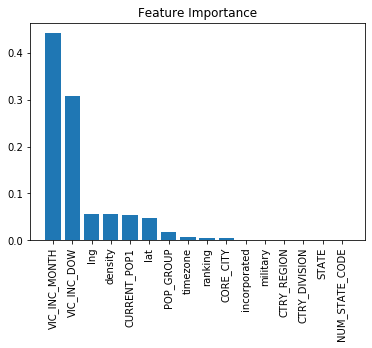

In [19]:
# Find most important features in Random Forest model
import matplotlib.pyplot as plt

# Calculate feature importances
tn_importances = tn_forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(tn_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
tn_names = [tn_X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(tn_X_train.shape[1]), tn_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(tn_X_train.shape[1]), tn_names, rotation=90)

# Show plot
plt.show()


In [20]:
# Re-run random forest, limiting to important features 

# Drop features w/ little importance
tn_data_model_X.drop(['CTRY_DIVISION', 'CTRY_REGION', 'military', 'incorporated', 'STATE', 'NUM_STATE_CODE'],
                  axis=1, inplace = True)

# Split the data into training and validation datasets
# Save 30% for validation
tn_X_train, tn_X_val, tn_y_train, tn_y_val = train_test_split(tn_data_model_X, tn_data_model_y, test_size =0.3, random_state=7)

tn_rf_model = RandomForestClassifier(random_state=0, n_estimators=445, n_jobs=-1, max_depth=18, bootstrap=False)
tn_forest = tn_rf_model.fit(tn_X_train, tn_y_train)
tn_y_pred_forest = tn_forest.predict(tn_X_val)
print(classification_report(tn_y_val, tn_y_pred_forest))

              precision    recall  f1-score   support

          91       0.00      0.00      0.00        52
          92       0.00      0.00      0.00         2
          93       0.00      0.00      0.00         6
         100       0.19      0.05      0.08       323
         111       0.18      0.01      0.03       267
         112       0.86      0.79      0.82       154
         113       0.00      0.00      0.00        28
         114       0.48      0.11      0.18       366
         120       0.25      0.23      0.24      2027
         131       0.31      0.38      0.34      6936
         132       0.22      0.55      0.31     14417
         133       0.22      0.31      0.26      4151
         200       0.12      0.11      0.11       151
         210       0.00      0.00      0.00        48
         220       0.23      0.21      0.22      6810
         231       0.00      0.00      0.00        46
         232       0.00      0.00      0.00        28
         233       0.17    

C:\Users\amomu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
